In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.9205 - accuracy: 0.3080 - val_loss: 1.7752 - val_accuracy: 0.3651
Epoch 2/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.7089 - accuracy: 0.3870 - val_loss: 1.6826 - val_accuracy: 0.4093
Epoch 3/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.6122 - accuracy: 0.4247 - val_loss: 1.5904 - val_accuracy: 0.4348
Epoch 4/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.5466 - accuracy: 0.4458 - val_loss: 1.7187 - val_accuracy: 0.4073
Epoch 5/100
50000/50000 [==============================] - 6s 118us/step - loss: 1.5063 - accuracy: 0.4621 - val_loss: 1.5005 - val_accuracy: 0.4659
Epoch 6/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.4621 - accuracy: 0.4770 - val_loss: 1.4826 - val_accuracy: 0.4708
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 6s 114us/step - loss: 0.5870 - accuracy: 0.7934 - val_loss: 1.9117 - val_accuracy: 0.5110
Epoch 56/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.5815 - accuracy: 0.7927 - val_loss: 2.0067 - val_accuracy: 0.5164
Epoch 57/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.5629 - accuracy: 0.7995 - val_loss: 1.9925 - val_accuracy: 0.5054
Epoch 58/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5730 - accuracy: 0.7934 - val_loss: 1.9382 - val_accuracy: 0.5194
Epoch 59/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.5497 - accuracy: 0.8052 - val_loss: 2.0358 - val_accuracy: 0.5171
Epoch 60/100
50000/50000 [==============================] - 6s 127us/step - loss: 0.5345 - accuracy: 0.8094 - val_loss: 2.0825 - val_accuracy: 0.5138
Epoch 61/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.5240 - accuracy: 0.8129 - val

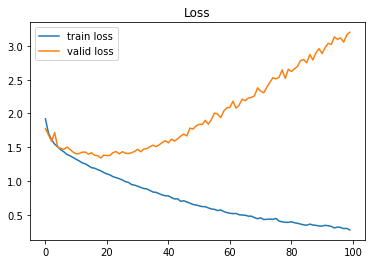

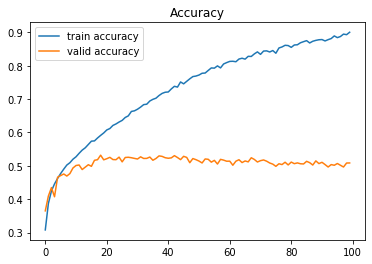

In [7]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)

    return model

model = build_mlp()

In [10]:
# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.3008 - accuracy: 0.8919 - val_loss: 3.2071 - val_accuracy: 0.5071
Epoch 2/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.2983 - accuracy: 0.8941 - val_loss: 3.3692 - val_accuracy: 0.4997
Epoch 3/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.2830 - accuracy: 0.8985 - val_loss: 3.3068 - val_accuracy: 0.4930
Epoch 4/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.2804 - accuracy: 0.8986 - val_loss: 3.3647 - val_accuracy: 0.4999
Epoch 5/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.2760 - accuracy: 0.9007 - val_loss: 3.3651 - val_accuracy: 0.4976
Epoch 6/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.2718 - accuracy: 0.9012 - val_loss: 3.4530 - val_accuracy: 0.4985
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 111us/step - loss: 0.1914 - accuracy: 0.9325 - val_loss: 4.5084 - val_accuracy: 0.4996
Epoch 56/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.1495 - accuracy: 0.9461 - val_loss: 4.6224 - val_accuracy: 0.5074
Epoch 57/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.1974 - accuracy: 0.9306 - val_loss: 4.6566 - val_accuracy: 0.4985
Epoch 58/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.1863 - accuracy: 0.9328 - val_loss: 4.5326 - val_accuracy: 0.4966
Epoch 59/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.2139 - accuracy: 0.9240 - val_loss: 4.6231 - val_accuracy: 0.4983
Epoch 60/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.2495 - accuracy: 0.9130 - val_loss: 4.5487 - val_accuracy: 0.5004
Epoch 61/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.1643 - accuracy: 0.9417 - val

50000/50000 [==============================] - 6s 110us/step - loss: 0.1205 - accuracy: 0.9572 - val_loss: 5.7645 - val_accuracy: 0.4962
Epoch 110/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.1712 - accuracy: 0.9404 - val_loss: 5.7766 - val_accuracy: 0.4925
Epoch 111/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.1638 - accuracy: 0.9434 - val_loss: 5.3856 - val_accuracy: 0.5006
Epoch 112/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1983 - accuracy: 0.9334 - val_loss: 5.4242 - val_accuracy: 0.4865
Epoch 113/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1448 - accuracy: 0.9492 - val_loss: 5.6840 - val_accuracy: 0.4976
Epoch 114/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1019 - accuracy: 0.9643 - val_loss: 5.4306 - val_accuracy: 0.5020
Epoch 115/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0673 - accuracy: 0.9770

50000/50000 [==============================] - 5s 110us/step - loss: 0.1255 - accuracy: 0.9566 - val_loss: 5.9586 - val_accuracy: 0.5044
Epoch 164/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0645 - accuracy: 0.9781 - val_loss: 6.2487 - val_accuracy: 0.4949
Epoch 165/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0984 - accuracy: 0.9661 - val_loss: 6.2573 - val_accuracy: 0.4946
Epoch 166/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.1355 - accuracy: 0.9543 - val_loss: 6.1886 - val_accuracy: 0.4990
Epoch 167/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.1349 - accuracy: 0.9536 - val_loss: 6.2970 - val_accuracy: 0.5044
Epoch 168/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0882 - accuracy: 0.9690 - val_loss: 6.1786 - val_accuracy: 0.5010
Epoch 169/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.0878 - accuracy: 0.9699

50000/50000 [==============================] - 7s 142us/step - loss: 0.1190 - accuracy: 0.9609 - val_loss: 6.7195 - val_accuracy: 0.5050
Epoch 218/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0686 - accuracy: 0.9762 - val_loss: 6.9207 - val_accuracy: 0.4963
Epoch 219/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0605 - accuracy: 0.9792 - val_loss: 6.7666 - val_accuracy: 0.4907
Epoch 220/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0675 - accuracy: 0.9767 - val_loss: 6.7742 - val_accuracy: 0.4984
Epoch 221/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.1804 - accuracy: 0.9428 - val_loss: 6.9058 - val_accuracy: 0.4908
Epoch 222/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.1235 - accuracy: 0.9585 - val_loss: 6.7084 - val_accuracy: 0.4994
Epoch 223/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.1019 - accuracy: 0.9660

50000/50000 [==============================] - 5s 108us/step - loss: 0.1178 - accuracy: 0.9618 - val_loss: 7.2059 - val_accuracy: 0.4947
Epoch 272/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0830 - accuracy: 0.9722 - val_loss: 7.4084 - val_accuracy: 0.4922
Epoch 273/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.1037 - accuracy: 0.9662 - val_loss: 7.2515 - val_accuracy: 0.4882
Epoch 274/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0687 - accuracy: 0.9767 - val_loss: 7.3900 - val_accuracy: 0.5038
Epoch 275/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0533 - accuracy: 0.9822 - val_loss: 7.4673 - val_accuracy: 0.4914
Epoch 276/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0893 - accuracy: 0.9703 - val_loss: 7.3716 - val_accuracy: 0.4904
Epoch 277/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.2014 - accuracy: 0.9399

50000/50000 [==============================] - 7s 132us/step - loss: 0.0799 - accuracy: 0.9738 - val_loss: 7.5585 - val_accuracy: 0.4916
Epoch 326/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1554 - accuracy: 0.9533 - val_loss: 7.6103 - val_accuracy: 0.4933
Epoch 327/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0901 - accuracy: 0.9708 - val_loss: 7.5850 - val_accuracy: 0.4981
Epoch 328/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0583 - accuracy: 0.9810 - val_loss: 7.4509 - val_accuracy: 0.4983
Epoch 329/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0566 - accuracy: 0.9816 - val_loss: 7.8609 - val_accuracy: 0.4877
Epoch 330/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.1256 - accuracy: 0.9610 - val_loss: 7.6049 - val_accuracy: 0.4898
Epoch 331/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.1297 - accuracy: 0.9590

50000/50000 [==============================] - 5s 109us/step - loss: 0.0046 - accuracy: 0.9997 - val_loss: 7.1605 - val_accuracy: 0.5086
Epoch 380/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0039 - accuracy: 0.9998 - val_loss: 7.3012 - val_accuracy: 0.5082
Epoch 381/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 7.3537 - val_accuracy: 0.5047
Epoch 382/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 7.4417 - val_accuracy: 0.5051
Epoch 383/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 7.4505 - val_accuracy: 0.5093
Epoch 384/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 7.5012 - val_accuracy: 0.5066
Epoch 385/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.6117 - accuracy: 0.8639

50000/50000 [==============================] - 6s 114us/step - loss: 0.6384 - accuracy: 0.8379 - val_loss: 5.1668 - val_accuracy: 0.4918
Epoch 434/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.0739 - accuracy: 0.9771 - val_loss: 5.3761 - val_accuracy: 0.5047
Epoch 435/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.0265 - accuracy: 0.9944 - val_loss: 5.7441 - val_accuracy: 0.5039
Epoch 436/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0138 - accuracy: 0.9984 - val_loss: 5.8108 - val_accuracy: 0.5055
Epoch 437/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0078 - accuracy: 0.9998 - val_loss: 5.9560 - val_accuracy: 0.5079
Epoch 438/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0060 - accuracy: 0.9998 - val_loss: 6.0489 - val_accuracy: 0.5056
Epoch 439/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0050 - accuracy: 0.9999

50000/50000 [==============================] - 5s 110us/step - loss: 0.9012 - accuracy: 0.7792 - val_loss: 4.4709 - val_accuracy: 0.5000
Epoch 488/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.1074 - accuracy: 0.9639 - val_loss: 5.0640 - val_accuracy: 0.5002
Epoch 489/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.0446 - accuracy: 0.9875 - val_loss: 5.2919 - val_accuracy: 0.5027
Epoch 490/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0163 - accuracy: 0.9980 - val_loss: 5.5340 - val_accuracy: 0.5083
Epoch 491/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0083 - accuracy: 0.9998 - val_loss: 5.6847 - val_accuracy: 0.5096
Epoch 492/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 5.7772 - val_accuracy: 0.5087
Epoch 493/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.0056 - accuracy: 0.9998

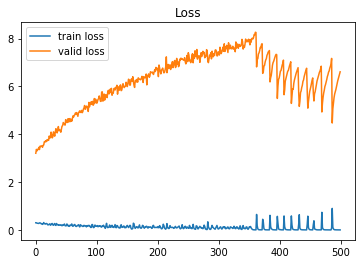

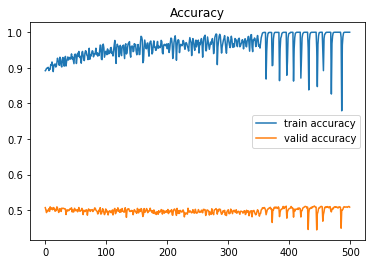

In [12]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [15]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)

    return model

In [16]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam',)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs= 100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.0657 - accuracy: 0.9779 - val_loss: 6.5881 - val_accuracy: 0.4880
Epoch 2/100
50000/50000 [==============================] - 6s 113us/step - loss: 0.0554 - accuracy: 0.9817 - val_loss: 6.4972 - val_accuracy: 0.4981
Epoch 3/100
50000/50000 [==============================] - 6s 114us/step - loss: 0.0676 - accuracy: 0.9770 - val_loss: 6.7269 - val_accuracy: 0.4918
Epoch 4/100
50000/50000 [==============================] - 6s 112us/step - loss: 0.0876 - accuracy: 0.9708 - val_loss: 6.3983 - val_accuracy: 0.4940
Epoch 5/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.0646 - accuracy: 0.9784 - val_loss: 6.6424 - val_accuracy: 0.4941
Epoch 6/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.0489 - accuracy: 0.9835 - val_loss: 6.8262 - val_accuracy: 0.4911
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 6s 112us/step - loss: 9.1196e-04 - accuracy: 1.0000 - val_loss: 7.4384 - val_accuracy: 0.5081
Epoch 56/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.6283 - accuracy: 0.8752 - val_loss: 4.0606 - val_accuracy: 0.4442
Epoch 57/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.4745 - accuracy: 0.8584 - val_loss: 4.9822 - val_accuracy: 0.4907
Epoch 58/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.1197 - accuracy: 0.9594 - val_loss: 5.1928 - val_accuracy: 0.5000
Epoch 59/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 5.5808 - val_accuracy: 0.4979
Epoch 60/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.0231 - accuracy: 0.9952 - val_loss: 5.6303 - val_accuracy: 0.5035
Epoch 61/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.0132 - accuracy: 0.9983 -

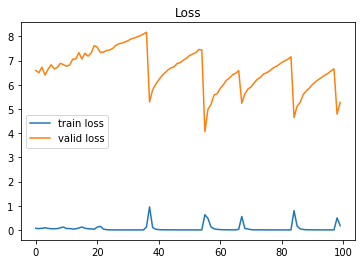

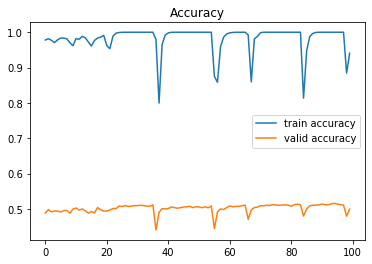

In [18]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()